## Name: Palash Khandekar
## SMU ID: 47497974
## Quest 3


## Part A. Beautiful Soup 

In [39]:
import bs4
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [40]:
url = "https://www.nasdaq.com/quotes/stock-quotes.aspx"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content, "html.parser")

In [41]:
divNode = soup.find('div', {'class':'genTable marginL15px'}).find('table')
childList = list(divNode.children)
print(len(childList))
childList = [x for x in childList if type(x) == bs4.element.Tag]
print(len(childList[1]))

13
3


In [42]:
nameList = []
volumeList = []
netchangeList = []
companyName = []
share = []
change = []


for child in childList:
    tdlist = child.find_all('td')

    if (len(tdlist) > 0):
        name = tdlist[0].getText().strip('\n')
        volume = tdlist[3].getText().strip('\n').strip('')
        netchange = tdlist[2].getText().strip('\n')
        nameList.append(name)
        volumeList.append(volume)
        netchangeList.append(netchange)

print(nameList)
print(volumeList)
print(netchangeList)

['Micron Technology, Inc.', 'Invesco QQQ Trust, Series 1\nInvesco QQQ Trust, Series 1', 'Apple Inc.', 'Marvell Technology Group Ltd.', 'JD.com, Inc.']
['45,632,121 ', '40,453,097 ', '35,791,794 ', '35,454,503 ', '24,782,813 ']
['0.21\xa0▲\xa00.47% ', '0.70\xa0▼\xa00.39% ', '1.80\xa0▼\xa00.81% ', '0.01\xa0▼\xa00.05% ', '0.30\xa0▼\xa01.10% ']


In [43]:
for company in nameList:
    nameList = company.split(',')[0]
    companyName.append(nameList)
print(companyName)

['Micron Technology', 'Invesco QQQ Trust', 'Apple Inc.', 'Marvell Technology Group Ltd.', 'JD.com']


In [44]:
for vol in volumeList:
    volumeList = vol.replace(',','')
    share.append(int(volumeList))
print(share)

[45632121, 40453097, 35791794, 35454503, 24782813]


In [45]:
for percent in netchangeList:
    if "▼" in percent:
        percent = percent.strip(' ')[-5:-1]
        change.append(float("-" + percent))
        
    else:
        percent = percent.strip(' ')[-5:-1]
        change.append(float(percent))

print(change)

[0.47, -0.39, -0.81, -0.05, -1.1]


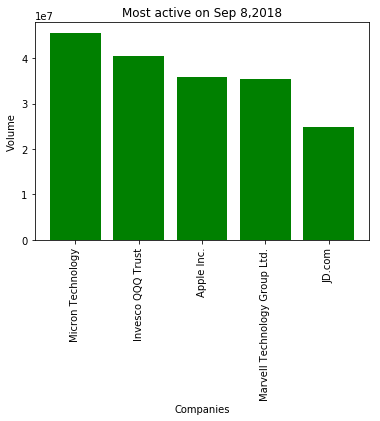

In [48]:
x = companyName
y = share
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x, y, color = 'green')
plt.xticks(x_pos, x, rotation=90)
plt.xlabel("Companies")
plt.ylabel("Volume")
plt.title("Most active on Sep 8,2018")
plt.show()

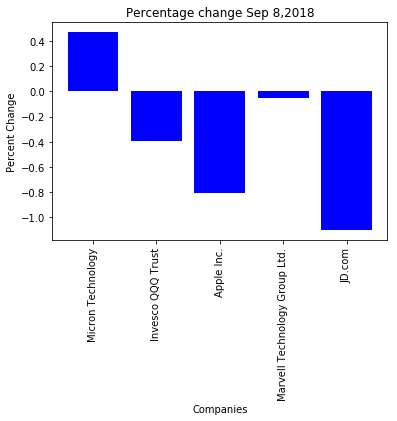

In [49]:
x = companyName
y = change
plt.bar(x, y, color = 'blue')
plt.xticks(x_pos, x, rotation=90)
plt.xlabel("Companies")
plt.ylabel("Percent Change")
plt.title("Percentage change Sep 8,2018")
plt.show()

## Part B. Timing Comparison

In [54]:
from collections import Counter
import timeit

In [59]:
def wordsInStringToDictWordCount(s):
    list = s.split(" ")
    temp ={}
    for i in range(len(list)):
        if list[i] != "":
            if list[i] not in temp:
                temp[list[i]]=1
            else:
                temp[list[i]] = temp[list[i]]+1

    print(temp)

def wordsInStringToDictWordCountWithCounter(s):
    print(Counter(s.split()))
    
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [60]:
arg = "hello hello world"

wordsInStringToDictWordCount(arg)
wordsInStringToDictWordCountWithCounter(arg)

{'hello': 2, 'world': 1}
Counter({'hello': 2, 'world': 1})


In [62]:
stringTodict = wrapper(wordsInStringToDictWordCount, arg)
timeit.timeit(stringTodict, number = 1)


{'hello': 2, 'world': 1}


0.00026657212038116995

In [63]:
stringTodict_withoutCounter = wrapper(wordsInStringToDictWordCountWithCounter, arg)
timeit.timeit(stringTodict_withoutCounter, number = 1)

Counter({'hello': 2, 'world': 1})


0.00034095555884050555

reading  100,000 words from a file 

In [ ]:
file = open("example.txt", 'r')
lines = file.readlines()
terms = ''.join(lines)

In [65]:
stringTodict = wrapper(wordsInStringToDictWordCount, terms)
stringTodict_time = timeit.timeit(stringTodict, number=1)

{'Lorem': 91, 'ipsum': 600, 'dolor': 450, 'sit': 1240, 'amet,': 230, 'consectetur': 320, 'adipiscing': 100, 'elit.': 230, 'Aliquam': 540, 'purus': 420, 'mauris,': 100, 'varius': 440, 'eget': 870, 'semper': 500, 'fringilla': 480, 'ut': 1080, 'felis.': 130, 'Vivamus': 400, 'tortor': 420, 'nisl,': 120, 'elementum': 440, 'nec': 1140, 'diam': 420, 'vel,': 170, 'ornare': 420, 'convallis': 340, 'diam.': 100, 'erat': 450, 'volutpat.': 90, 'Sed': 800, 'at': 1190, 'ultrices,': 60, 'cursus': 300, 'risus': 420, 'non,': 110, 'maximus': 400, 'dolor.': 190, 'feugiat': 390, 'congue': 340, 'est': 380, 'non': 1000, 'viverra.': 160, 'Maecenas': 540, 'quam': 340, 'et': 1150, 'nunc': 370, 'mollis': 480, 'venenatis.': 20, 'Duis': 280, 'imperdiet': 250, 'eu': 970, 'tellus': 360, 'fermentum.': 40, 'Donec': 700, 'eleifend': 400, 'luctus': 420, 'orci': 560, 'quis': 1080, 'convallis.\n\nVestibulum': 10, 'condimentum,': 30, 'rhoncus': 360, 'magna': 440, 'vitae,': 130, 'suscipit': 310, 'Nulla': 450, 'scelerisque':

In [66]:
stringTodictNoCounter = wrapper(wordsInStringToDictWordCountWithCounter, terms)
stringTodictNoCounter_time = timeit.timeit(stringTodictNoCounter, number=1)

Counter({'in': 1270, 'sit': 1240, 'ac': 1230, 'at': 1190, 'et': 1150, 'nec': 1140, 'ut': 1080, 'quis': 1080, 'id': 1080, 'vitae': 1060, 'vel': 1020, 'non': 1000, 'a': 990, 'sed': 990, 'eu': 970, 'amet': 920, 'Sed': 880, 'eget': 870, 'tincidunt': 790, 'Donec': 770, 'ipsum': 600, 'Aliquam': 600, 'orci': 560, 'Maecenas': 550, 'ante': 550, 'Proin': 550, 'Nulla': 520, 'dui': 520, 'blandit': 510, 'porta': 510, 'semper': 500, 'hendrerit': 500, 'Pellentesque': 500, 'malesuada': 490, 'eros': 490, 'fringilla': 480, 'mollis': 480, 'libero': 480, 'Vestibulum': 470, 'In': 470, 'augue': 470, 'Fusce': 470, 'Suspendisse': 470, 'Integer': 470, 'lorem': 470, 'Praesent': 470, 'Quisque': 470, 'metus': 470, 'Cras': 460, 'dolor': 450, 'erat': 450, 'justo': 450, 'posuere': 450, 'varius': 440, 'elementum': 440, 'magna': 440, 'mauris': 440, 'sodales': 440, 'lectus': 440, 'felis': 440, 'nulla': 440, 'velit': 440, 'turpis': 440, 'Vivamus': 430, 'euismod': 430, 'massa': 430, 'Aenean': 430, 'purus': 420, 'tortor':

In [67]:
# time taken to run the codes
print(stringTodict_time)
print(stringTodictNoCounter_time)

0.039288803706767794
0.02790020838710916


In [68]:
time = (stringTodict_time, stringTodictNoCounter_time)
print(time)

[0.039288803706767794, 0.02790020838710916]


Text(0.5,1,'Time comparision')

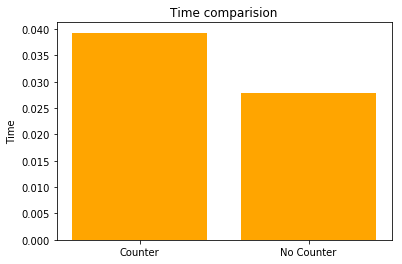

In [73]:
plt.bar([0,1],time, color = 'orange')
plt.xticks([0, 1], ["Counter", "No Counter"])
plt.ylabel("Time")
plt.title("Time comparision")


## Part C. PyTest for Regex 

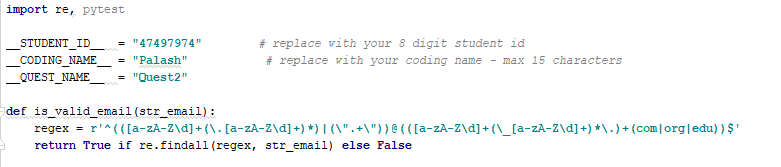

## Part D. CSV Files

In [123]:
import csv
import json
import pprint

pp = pprint.PrettyPrinter(indent=3)

WorldCup = []
year = []
location = []
first = []
second = []
third = []
fourth = []
matches =[]
attendance = []
goalsScore = []
main_dict = {}
wc_dict = []

In [124]:
with open('worldcup.csv') as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=',')
    for row in readCSV:
        WC = row["WorldCup"]
        yr = row["year"]
        loc = row["location"]
        pos1 = row["first"]
        pos2 = row["second"]
        pos3 = row["third"]
        pos4 = row["fourth"]
        score = row["goalsScored"]
        match = row["matchesPlayed"]
        attend = row["attendance"]

        WorldCup.append(WC)
        year.append(yr)
        location.append(loc)
        first.append(pos1)
        second.append(pos2)
        third.append(pos3)
        fourth.append(pos4)
        matches.append(match)
        attendance.append(attend)
        goalsScore.append(int(score))

for a, b, c, d, e, f, g, h, i, j in zip(WorldCup[1:],year[1:], location[1:], first[1:],second[1:], third[1:],fourth[1:],goalsScore[1:],matches[1:],attendance[1:]):

    temp_wc = {"World Cup": a,'year': b, 'location': c, 'first': d, 'second': e, 'third': f, 'fourth': g, 'goalscore': h, 'match': i, 'attendance': j}
    wc_dict.append(temp_wc)
# pp.pprint(wc_dict)

main_dict["WC_data"] = wc_dict
json_wc = json.dumps(main_dict,indent=2)

print(json_wc)

{
  "WC_data": [
    {
      "World Cup": "wc1934",
      "year": "1934",
      "location": "Italy",
      "first": "Italy",
      "second": "Czechoslovakia",
      "third": "Germany",
      "fourth": "Austria",
      "goalscore": 70,
      "match": "17",
      "attendance": "363000"
    },
    {
      "World Cup": "wc1938",
      "year": "1938",
      "location": "France",
      "first": "Italy",
      "second": "Hungary",
      "third": "Brazil",
      "fourth": "Sweden",
      "goalscore": 84,
      "match": "18",
      "attendance": "375000"
    },
    {
      "World Cup": "wc1950",
      "year": "1950",
      "location": "Brazil",
      "first": "Uruguay",
      "second": "Brazil",
      "third": "Sweden",
      "fourth": "Spain",
      "goalscore": 88,
      "match": "22",
      "attendance": "1045246"
    },
    {
      "World Cup": "wc1954",
      "year": "1954",
      "location": "Switzerland",
      "first": "GermanyFR",
      "second": "Hungary",
      "third": "Austria",
  

 ## 5 greatest total goals scored

In [128]:
top_5 = sorted(goalsScore.copy())[-5:]

for wc in main_dict["WC_data"]:
    if wc["goalscore"] in top_5:
        print(json.dumps(wc, indent=2)) 

{
  "World Cup": "wc1998",
  "year": "1998",
  "location": "France",
  "first": "France",
  "second": "Brazil",
  "third": "Croatia",
  "fourth": "Netherlands",
  "goalscore": 171,
  "match": "64",
  "attendance": "2785100"
}
{
  "World Cup": "wc2002",
  "year": "2002",
  "location": "Korea_Japan",
  "first": "Brazil",
  "second": "Germany",
  "third": "Turkey",
  "fourth": "KoreaRepublic",
  "goalscore": 161,
  "match": "64",
  "attendance": "2705197"
}
{
  "World Cup": "wc2006",
  "year": "2006",
  "location": "Germany",
  "first": "Italy",
  "second": "France",
  "third": "Germany",
  "fourth": "Portugal",
  "goalscore": 147,
  "match": "64",
  "attendance": "3359439"
}
{
  "World Cup": "wc2014",
  "year": "2014",
  "location": "Brazil",
  "first": "Germany",
  "second": "Argentina",
  "third": "Netherlands",
  "fourth": "Brazil",
  "goalscore": 171,
  "match": "64",
  "attendance": "3386810"
}
{
  "World Cup": "wc2018",
  "year": "2018",
  "location": "Russia",
  "first": "France",

## plot a bar chart of the goals (y-axis) vs year (x-axis)  

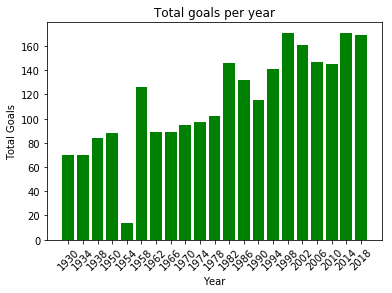

In [129]:
x_pos = [i for i, _ in enumerate(year)]

plt.bar(x_pos, goalsScore, color='green')
plt.xticks(x_pos, year, rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Total goals per year")
plt.show()